✅ Raw data loaded successfully
Shape: (1481, 21)
Columns: ['Date', 'Close_HDFCBANK.NS', 'Close_RELIANCE.NS', 'Close_TCS.NS', 'Close_^NSEI', 'High_HDFCBANK.NS', 'High_RELIANCE.NS', 'High_TCS.NS', 'High_^NSEI', 'Low_HDFCBANK.NS', 'Low_RELIANCE.NS', 'Low_TCS.NS', 'Low_^NSEI', 'Open_HDFCBANK.NS', 'Open_RELIANCE.NS', 'Open_TCS.NS', 'Open_^NSEI', 'Volume_HDFCBANK.NS', 'Volume_RELIANCE.NS', 'Volume_TCS.NS', 'Volume_^NSEI']

Missing values per column:
 Date                  0
Close_HDFCBANK.NS     0
Close_RELIANCE.NS     0
Close_TCS.NS          0
Close_^NSEI           3
High_HDFCBANK.NS      0
High_RELIANCE.NS      0
High_TCS.NS           0
High_^NSEI            3
Low_HDFCBANK.NS       0
Low_RELIANCE.NS       0
Low_TCS.NS            0
Low_^NSEI             3
Open_HDFCBANK.NS      0
Open_RELIANCE.NS      0
Open_TCS.NS           0
Open_^NSEI            3
Volume_HDFCBANK.NS    0
Volume_RELIANCE.NS    0
Volume_TCS.NS         0
Volume_^NSEI          3
dtype: int64


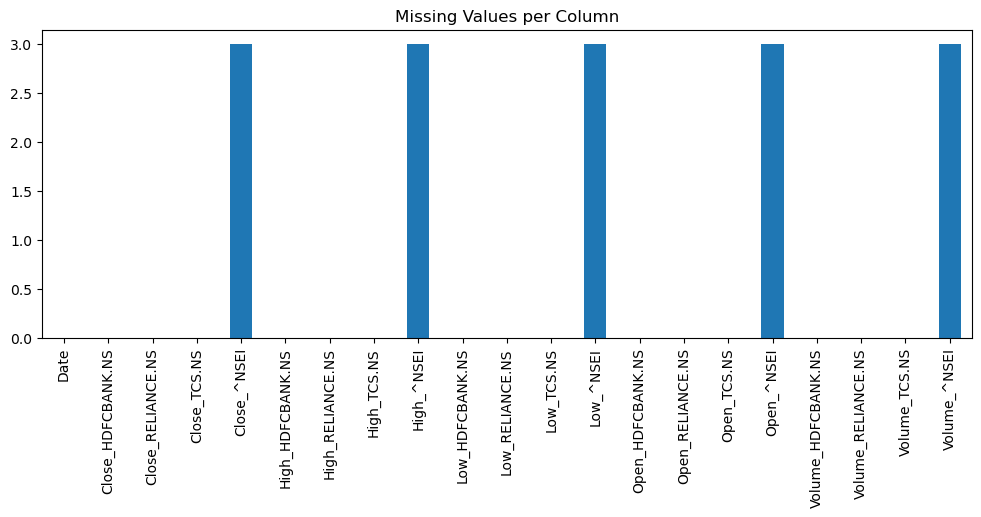


After filling:
0 missing values remaining

✅ Cleaned dataset saved as ../data/processed/stocks_clean.csv


,Date,Close_HDFCBANK.NS,Close_RELIANCE.NS,Close_TCS.NS,Close_^NSEI,High_HDFCBANK.NS,High_RELIANCE.NS,High_TCS.NS,High_^NSEI,Low_HDFCBANK.NS,...,Low_TCS.NS,Low_^NSEI,Open_HDFCBANK.NS,Open_RELIANCE.NS,Open_TCS.NS,Open_^NSEI,Volume_HDFCBANK.NS,Volume_RELIANCE.NS,Volume_TCS.NS,Volume_^NSEI
0,2019-01-01,504.392517,498.490570,1610.928345,10792.500000,505.073439,501.292117,1617.023891,10895.349609,494.413149,...,1595.858657,10735.049805,499.590634,500.380512,1605.171360,10868.849609,6373440,9746670,1094883,309700.0
1,2019-01-02,499.790222,491.998230,1628.283691,10792.500000,504.251587,501.158723,1637.723302,10895.349609,497.723895,...,1608.557654,10735.049805,503.147997,495.600156,1612.790700,10868.849609,8134232,15628818,2100463,309700.0
2,2019-01-03,495.868988,485.928284,1608.515015,10672.250000,499.731579,495.644616,1646.612426,10814.049805,493.802660,...,1602.715763,10661.250000,498.780593,492.487362,1624.642960,10796.799805,12771664,16288287,2611668,286200.0
3,2019-01-04,497.195618,488.551941,1588.958862,10727.349609,499.790265,491.131123,1609.573781,10741.049805,495.528510,...,1558.607935,10628.650391,496.679050,487.996102,1608.557891,10699.700195,7287120,18516544,4280862,296600.0
4,2019-01-07,497.946960,491.264465,1606.779663,10771.799805,501.398694,497.356638,1616.007724,10835.950195,497.324740,...,1592.471947,10750.150391,499.602373,492.265005,1601.615368,10804.849609,5387012,12060290,1856423,269400.0


In [1]:
# ============================
# 🧹 PHASE 2: DATA PREPROCESSING
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Load raw data
# ----------------------------
raw_path = '../data/raw/stocks_raw.csv'
data = pd.read_csv(raw_path, parse_dates=['Date'])

print("✅ Raw data loaded successfully")
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())

# ----------------------------
# Check for missing values
# ----------------------------
missing = data.isna().sum()
print("\nMissing values per column:\n", missing)

# Visualize missingness (optional but useful)
missing.plot(kind='bar', figsize=(12,4), title='Missing Values per Column')
plt.show()

# ----------------------------
# Handle missing values
# ----------------------------
# Forward-fill (if any NaNs at the start, backfill once)
data = data.ffill().bfill()

# Double-check missing
print("\nAfter filling:")
print(data.isna().sum().sum(), "missing values remaining")

# ----------------------------
# Sort and remove duplicates
# ----------------------------
data = data.sort_values(by='Date').drop_duplicates(subset='Date')

# ----------------------------
# Optional: Keep only relevant columns
# (We’ll keep all Open, High, Low, Close, Volume for now)
# ----------------------------

# ----------------------------
# Save processed data
# ----------------------------
output_path = '../data/processed/stocks_clean.csv'
data.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved as {output_path}")

# Preview
data.head()
